In [47]:
## This notebook is based on https://www.tensorflow.org/tutorials/quickstart/beginner and https://www.tensorflow.org/tutorials/keras/classification
import tensorflow as tf
import numpy as np

In [48]:
# load mnist data set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('datatype before scaling is ',x_train.dtype)

# Rescale the images from [0,255] to the [0.0,1.0] range (uint8 to float64)
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
print('datatype after scaling  is ',x_train.dtype)

datatype before scaling is  uint8
datatype after scaling  is  float64


In [68]:
# define the nerual network (fully connected network)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(32,activation='relu'),
  tf.keras.layers.Dense(10)                     # you may use softmax here, but it's not required when you use Categorical Cross Entropy
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Using from_logits=True may be more numerically stable (should be set when you didn't use softmax activation)
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_41 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_42 (Dense)             (None, 10)                330       
Total params: 105,450
Trainable params: 105,194
Non-trainable params: 256
_________________________________________________________________


In [ ]:
model.fit(
    x_train,y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_test, y_test),
)

In [72]:
cnn_results = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1592 - sparse_categorical_accuracy: 0.9839


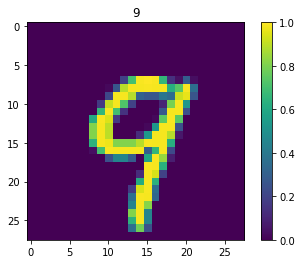

In [74]:
import matplotlib.pyplot as plt
index_show = 12
plt.figure()
plt.imshow(np.squeeze(x_test[index_show]))
plt.colorbar()
plt.grid(False)
plt.title(y_test[index_show])
plt.show()